In [1]:
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.preprocessing import OneHotEncoder

## 1. 读取结构化数据集

In [2]:
df = pd.read_csv(f'../Dataset/Final_Dataset_2.csv')
df = df.drop(columns=['Time', 'Primary Intent'])
df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,...,Target_Area_State,Target_Area_Pos_X,Target_Area_Pos_Y,Trapped_People_State,Trapped_People_Pos_X,Trapped_People_Pos_Y,Gaze point X,Gaze point Y,AOI,Secondary Intent
0,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2067.0,1195.0,4,Intent_0_0
1,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1204.0,4,Intent_0_0
2,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1200.0,4,Intent_0_0
3,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2053.0,1221.0,4,Intent_0_0
4,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2068.0,1209.0,4,Intent_0_0


In [3]:
num_Intent_0_0 = (df['Secondary Intent'] == 'Intent_0_0').sum()
print(f'The number of Intent_0_0:{num_Intent_0_0}')
num_Intent_1_1 = (df['Secondary Intent'] == 'Intent_1_1').sum()
print(f'The number of Intent_1_1:{num_Intent_1_1}')
num_Intent_1_2 = (df['Secondary Intent'] == 'Intent_1_2').sum()
print(f'The number of Intent_1_2:{num_Intent_1_2}')
num_Intent_2_1 = (df['Secondary Intent'] == 'Intent_2_1').sum()
print(f'The number of Intent_2_1:{num_Intent_2_1}')
num_Intent_2_2 = (df['Secondary Intent'] == 'Intent_2_2').sum()
print(f'The number of Intent_2_2:{num_Intent_2_2}')
num_Intent_2_3 = (df['Secondary Intent'] == 'Intent_2_3').sum()
print(f'The number of Intent_2_3:{num_Intent_2_3}')
num_Intent_3_1 = (df['Secondary Intent'] == 'Intent_3_1').sum()
print(f'The number of Intent_3_1:{num_Intent_3_1}')
num_Intent_3_2 = (df['Secondary Intent'] == 'Intent_3_2').sum()
print(f'The number of Intent_3_2:{num_Intent_3_2}')
num_Intent_3_3 = (df['Secondary Intent'] == 'Intent_3_3').sum()
print(f'The number of Intent_3_3:{num_Intent_3_3}')
num_Intent_3_4 = (df['Secondary Intent'] == 'Intent_3_4').sum()
print(f'The number of Intent_3_4:{num_Intent_3_4}')
num_Intent_3_5 = (df['Secondary Intent'] == 'Intent_3_5').sum()
print(f'The number of Intent_3_5:{num_Intent_3_5}')
num_Intent_4_1 = (df['Secondary Intent'] == 'Intent_4_1').sum()
print(f'The number of Intent_4_1:{num_Intent_4_1}')
num_Intent_4_2 = (df['Secondary Intent'] == 'Intent_4_2').sum()
print(f'The number of Intent_4_2:{num_Intent_4_2}')
num_Intent_4_3 = (df['Secondary Intent'] == 'Intent_4_3').sum()
print(f'The number of Intent_4_3:{num_Intent_4_3}')
num_Intent_4_4 = (df['Secondary Intent'] == 'Intent_4_4').sum()
print(f'The number of Intent_4_4:{num_Intent_4_4}')
num_Intent_5_1 = (df['Secondary Intent'] == 'Intent_5_1').sum()
print(f'The number of Intent_5_1:{num_Intent_5_1}')
num_Intent_5_2 = (df['Secondary Intent'] == 'Intent_5_2').sum()
print(f'The number of Intent_5_2:{num_Intent_5_2}')
num_Intent_5_3 = (df['Secondary Intent'] == 'Intent_5_3').sum()
print(f'The number of Intent_5_3:{num_Intent_5_3}')
num_Intent_5_4 = (df['Secondary Intent'] == 'Intent_5_4').sum()
print(f'The number of Intent_5_4:{num_Intent_5_4}')

The number of Intent_0_0:134520
The number of Intent_1_1:7700
The number of Intent_1_2:12740
The number of Intent_2_1:12657
The number of Intent_2_2:98145
The number of Intent_2_3:12630
The number of Intent_3_1:301233
The number of Intent_3_2:10916
The number of Intent_3_3:10430
The number of Intent_3_4:26135
The number of Intent_3_5:26766
The number of Intent_4_1:125421
The number of Intent_4_2:82777
The number of Intent_4_3:920
The number of Intent_4_4:113165
The number of Intent_5_1:57129
The number of Intent_5_2:80182
The number of Intent_5_3:12775
The number of Intent_5_4:48448


**重新梳理意图标签如下**
* Intent_1: 阅读任务清单，对应原Intent_1_1
* Intent_2：申请建立编队，对应原Intent_1_2
* Intent_3：选择无人机，对应原Intent_2_1和Intent_3_2
* Intent_4：规划勘探区域，对应原Intent_2_2
* Intent_5：发派勘探任务，对应原Intent_2_3
* Intent_6：监视任务总体态势，对应原Intent_3_1
* Intent_7：打开无人机画面，对应原Intent_3_3
* Intent_8：监测无人机画面，对应原Intent_3_4
* Intent_9：上报勘探结果，对应原Intent_3_5
* Intent_10：前往目标区域，对应原Intent_4_1和Intent_5_1
* Intent_11：自由巡航飞行，对应原Intent_4_2
* Intent_12：开启勘探模式，对应原Intent_4_3
* Intent_13：勘探模式飞行，对应原Intent_4_4
* Intent_14：进入着陆状态，对应原Intent_5_2
* Intent_15：等待救援完毕，对应原Intent_5_3
* Intent_16：回归任务高度，对应原Intent_5_4

In [4]:
df['New Intent'] = None
for index, row in df.iterrows():
    if row['Secondary Intent'] == 'Intent_0_0':
        df.at[index, 'New Intent'] = '00'
    if row['Secondary Intent'] == 'Intent_1_1':
        df.at[index, 'New Intent'] = '01'
    if row['Secondary Intent'] == 'Intent_1_2':
        df.at[index, 'New Intent'] = '02'
    if row['Secondary Intent'] == 'Intent_2_1' or row['Secondary Intent'] == 'Intent_3_2':
        df.at[index, 'New Intent'] = '03'
    if row['Secondary Intent'] == 'Intent_2_2':
        df.at[index, 'New Intent'] = '04'
    if row['Secondary Intent'] == 'Intent_2_3':
        df.at[index, 'New Intent'] = '05'
    if row['Secondary Intent'] == 'Intent_3_1':
        df.at[index, 'New Intent'] = '06'
    if row['Secondary Intent'] == 'Intent_3_3':
        df.at[index, 'New Intent'] = '07'
    if row['Secondary Intent'] == 'Intent_3_4':
        df.at[index, 'New Intent'] = '08'
    if row['Secondary Intent'] == 'Intent_3_5':
        df.at[index, 'New Intent'] = '09'
    if row['Secondary Intent'] == 'Intent_4_1' or row['Secondary Intent'] == 'Intent_5_1':
        df.at[index, 'New Intent'] = '10'
    if row['Secondary Intent'] == 'Intent_4_2':
        df.at[index, 'New Intent'] = '11'
    if row['Secondary Intent'] == 'Intent_4_3':
        df.at[index, 'New Intent'] = '12'
    if row['Secondary Intent'] == 'Intent_4_4':
        df.at[index, 'New Intent'] = '13'
    if row['Secondary Intent'] == 'Intent_5_2':
        df.at[index, 'New Intent'] = '14'
    if row['Secondary Intent'] == 'Intent_5_3':
        df.at[index, 'New Intent'] = '15'
    if row['Secondary Intent'] == 'Intent_5_4':
        df.at[index, 'New Intent'] = '16'

df.drop(columns=['Secondary Intent'], inplace=True)
df.rename(columns={'New Intent': 'Intent'}, inplace=True)
df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,...,Target_Area_State,Target_Area_Pos_X,Target_Area_Pos_Y,Trapped_People_State,Trapped_People_Pos_X,Trapped_People_Pos_Y,Gaze point X,Gaze point Y,AOI,Intent
0,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2067.0,1195.0,4,00
1,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1204.0,4,00
2,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1200.0,4,00
3,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2053.0,1221.0,4,00
4,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2068.0,1209.0,4,00


In [5]:
# 离散特征变量使用One-Hot编码，通过DataFrame实现
df = pd.get_dummies(df, columns=['Flight_Fleet_State', 'Flight_Fly_Mode', 'UAV_Selected_Now', 'UAV1_Task_State', 'UAV2_Task_State',
                                 'UAV3_Task_State', 'UAV4_Task_State', 'AOI', 'Intent'])
df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,...,Intent_07,Intent_08,Intent_09,Intent_10,Intent_11,Intent_12,Intent_13,Intent_14,Intent_15,Intent_16
0,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# 设置训练集和测试集
train_ids = [i for i in range(1, 51) if i % 5 != 0]
test_ids = [i for i in range(1, 51) if i % 5 == 0]
print("train IDs:", train_ids)
print("test IDs:", test_ids)

df_train = df[df['ID'].isin(train_ids)]
df_test = df[df['ID'].isin(test_ids)]
print(df_train.shape, df_test.shape)

train IDs: [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49]
test IDs: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
(941603, 96) (233086, 96)


In [7]:
# 数据归一化-训练集
df_train.loc[:, 'Hotas_Axis_X']  = (df_train['Hotas_Axis_X']+1)/2
df_train.loc[:, 'Hotas_Axis_Y']  = (df_train['Hotas_Axis_Y']+1)/2
df_train.loc[:, 'Hotas_Axis_Z']  = (df_train['Hotas_Axis_Z']+1)/2

df_train.loc[:, 'Flight_Pos_X']  = (df_train['Flight_Pos_X']-df_train['Flight_Pos_X'].min())/(df_train['Flight_Pos_X'].max()-df_train['Flight_Pos_X'].min())
df_train.loc[:, 'Flight_Pos_Y']  = (df_train['Flight_Pos_Y']-df_train['Flight_Pos_Y'].min())/(df_train['Flight_Pos_Y'].max()-df_train['Flight_Pos_Y'].min())
df_train.loc[:, 'Flight_Speed']  = (df_train['Flight_Speed']-df_train['Flight_Speed'].min())/(df_train['Flight_Speed'].max()-df_train['Flight_Speed'].min())
df_train.loc[:, 'Flight_Height']  = (df_train['Flight_Height']-df_train['Flight_Height'].min())/(df_train['Flight_Height'].max()-df_train['Flight_Height'].min())
df_train.loc[:, 'Flight_Heading']  = (df_train['Flight_Heading']-df_train['Flight_Heading'].min())/(df_train['Flight_Heading'].max()-df_train['Flight_Heading'].min())

df_train.loc[:, 'UAV1_Pos_X']  = df_train['UAV1_Pos_X']/3840
df_train.loc[:, 'UAV1_Pos_Y']  = df_train['UAV1_Pos_Y']/2160
df_train.loc[:, 'UAV2_Pos_X']  = df_train['UAV2_Pos_X']/3840
df_train.loc[:, 'UAV2_Pos_Y']  = df_train['UAV2_Pos_Y']/2160
df_train.loc[:, 'UAV3_Pos_X']  = df_train['UAV3_Pos_X']/3840
df_train.loc[:, 'UAV3_Pos_Y']  = df_train['UAV3_Pos_Y']/2160
df_train.loc[:, 'UAV4_Pos_X']  = df_train['UAV4_Pos_X']/3840
df_train.loc[:, 'UAV4_Pos_Y']  = df_train['UAV4_Pos_Y']/2160

df_train.loc[:, 'Target_Area_Pos_X']  = (df_train['Target_Area_Pos_X']-df_train['Target_Area_Pos_X'].min())/(df_train['Target_Area_Pos_X'].max()-df_train['Target_Area_Pos_X'].min())
df_train.loc[:, 'Target_Area_Pos_Y']  = (df_train['Target_Area_Pos_Y']-df_train['Target_Area_Pos_Y'].min())/(df_train['Target_Area_Pos_Y'].max()-df_train['Target_Area_Pos_Y'].min())
df_train.loc[:, 'Trapped_People_Pos_X']  = (df_train['Trapped_People_Pos_X']-df_train['Trapped_People_Pos_X'].min())/(df_train['Trapped_People_Pos_X'].max()-df_train['Trapped_People_Pos_X'].min())
df_train.loc[:, 'Trapped_People_Pos_Y']  = (df_train['Trapped_People_Pos_Y']-df_train['Trapped_People_Pos_Y'].min())/(df_train['Trapped_People_Pos_Y'].max()-df_train['Trapped_People_Pos_Y'].min())

df_train.loc[:, 'Gaze point X']  = df_train['Gaze point X']/3840
df_train.loc[:, 'Gaze point Y']  = df_train['Gaze point Y']/2160

# 数据归一化-测试集
df_test.loc[:, 'Hotas_Axis_X']  = (df_test['Hotas_Axis_X']+1)/2
df_test.loc[:, 'Hotas_Axis_Y']  = (df_test['Hotas_Axis_Y']+1)/2
df_test.loc[:, 'Hotas_Axis_Z']  = (df_test['Hotas_Axis_Z']+1)/2

df_test.loc[:, 'Flight_Pos_X']  = (df_test['Flight_Pos_X']-df_test['Flight_Pos_X'].min())/(df_test['Flight_Pos_X'].max()-df_test['Flight_Pos_X'].min())
df_test.loc[:, 'Flight_Pos_Y']  = (df_test['Flight_Pos_Y']-df_train['Flight_Pos_Y'].min())/(df_test['Flight_Pos_Y'].max()-df_test['Flight_Pos_Y'].min())
df_test.loc[:, 'Flight_Speed']  = (df_test['Flight_Speed']-df_train['Flight_Speed'].min())/(df_test['Flight_Speed'].max()-df_test['Flight_Speed'].min())
df_test.loc[:, 'Flight_Height']  = (df_test['Flight_Height']-df_test['Flight_Height'].min())/(df_test['Flight_Height'].max()-df_test['Flight_Height'].min())
df_test.loc[:, 'Flight_Heading']  = (df_test['Flight_Heading']-df_test['Flight_Heading'].min())/(df_test['Flight_Heading'].max()-df_test['Flight_Heading'].min())

df_test.loc[:, 'UAV1_Pos_X']  = df_test['UAV1_Pos_X']/3840
df_test.loc[:, 'UAV1_Pos_Y']  = df_test['UAV1_Pos_Y']/2160
df_test.loc[:, 'UAV2_Pos_X']  = df_test['UAV2_Pos_X']/3840
df_test.loc[:, 'UAV2_Pos_Y']  = df_test['UAV2_Pos_Y']/2160
df_test.loc[:, 'UAV3_Pos_X']  = df_test['UAV3_Pos_X']/3840
df_test.loc[:, 'UAV3_Pos_Y']  = df_test['UAV3_Pos_Y']/2160
df_test.loc[:, 'UAV4_Pos_X']  = df_test['UAV4_Pos_X']/3840
df_test.loc[:, 'UAV4_Pos_Y']  = df_test['UAV4_Pos_Y']/2160

df_test.loc[:, 'Target_Area_Pos_X']  = (df_test['Target_Area_Pos_X']-df_test['Target_Area_Pos_X'].min())/(df_test['Target_Area_Pos_X'].max()-df_test['Target_Area_Pos_X'].min())
df_test.loc[:, 'Target_Area_Pos_Y']  = (df_test['Target_Area_Pos_Y']-df_test['Target_Area_Pos_Y'].min())/(df_test['Target_Area_Pos_Y'].max()-df_test['Target_Area_Pos_Y'].min())
df_test.loc[:, 'Trapped_People_Pos_X']  = (df_test['Trapped_People_Pos_X']-df_test['Trapped_People_Pos_X'].min())/(df_test['Trapped_People_Pos_X'].max()-df_test['Trapped_People_Pos_X'].min())
df_test.loc[:, 'Trapped_People_Pos_Y']  = (df_test['Trapped_People_Pos_Y']-df_test['Trapped_People_Pos_Y'].min())/(df_test['Trapped_People_Pos_Y'].max()-df_test['Trapped_People_Pos_Y'].min())

df_test.loc[:, 'Gaze point X']  = df_test['Gaze point X']/3840
df_test.loc[:, 'Gaze point Y']  = df_test['Gaze point Y']/2160

pd.set_option('display.max_columns', None)
df_train.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,Hotas_Btn_Assign_Up,Hotas_Btn_Assign_Down,Hotas_Btn_Assign_Left,Hotas_Btn_Assign_Right,Hotas_Btn_Change_Mode,Hotas_Btn_Open_UAV_Sensor,Hotas_Btn_Open_Helicopter_Sensor,Hotas_Btn_Select_Normal,Hotas_Btn_Select_Fire,Hotas_Btn_Select_Person,Hotas_Btn_Submit_Result,Hotas_Btn_Area_Assign,Flight_Pos_X,Flight_Pos_Y,Flight_Speed,Flight_Height,Flight_Heading,Flight_Sensor,UAV1_Pos_X,UAV1_Pos_Y,UAV2_Pos_X,UAV2_Pos_Y,UAV3_Pos_X,UAV3_Pos_Y,UAV4_Pos_X,UAV4_Pos_Y,UAV_Sensor_State,Task_List_State,Target_Area_State,Target_Area_Pos_X,Target_Area_Pos_Y,Trapped_People_State,Trapped_People_Pos_X,Trapped_People_Pos_Y,Gaze point X,Gaze point Y,Flight_Fleet_State_0,Flight_Fleet_State_1,Flight_Fleet_State_2,Flight_Fly_Mode_0,Flight_Fly_Mode_1,UAV_Selected_Now_-1.0,UAV_Selected_Now_1.0,UAV_Selected_Now_2.0,UAV_Selected_Now_3.0,UAV_Selected_Now_4.0,UAV1_Task_State_0,UAV1_Task_State_1,UAV1_Task_State_2,UAV1_Task_State_3,UAV2_Task_State_0,UAV2_Task_State_1,UAV2_Task_State_2,UAV2_Task_State_3,UAV3_Task_State_0,UAV3_Task_State_1,UAV3_Task_State_2,UAV3_Task_State_3,UAV4_Task_State_0,UAV4_Task_State_1,UAV4_Task_State_2,UAV4_Task_State_3,AOI_0,AOI_1,AOI_2,AOI_3,AOI_4,AOI_5,AOI_6,Intent_00,Intent_01,Intent_02,Intent_03,Intent_04,Intent_05,Intent_06,Intent_07,Intent_08,Intent_09,Intent_10,Intent_11,Intent_12,Intent_13,Intent_14,Intent_15,Intent_16
0,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.4499,0.127802,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.538281,0.553241,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.4499,0.127802,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.532813,0.557407,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.4499,0.127802,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.532813,0.555556,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.4499,0.127802,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.534635,0.565278,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.4499,0.127802,0.0,0.40634,0.000016,False,0.

## 2. 定义Dataset和DataLoader

In [8]:
from torch.utils.data import DataLoader, Dataset
import numpy as np

class MyDataset(Dataset):
    # 实例化调用，数据集初始化
    def __init__(self, df, time_step):
        # 初始化输入输出
        x = []
        y = []
        num_intent_0 = 0
        
        # 根据test_id划分DataFrame
        grouped = df.groupby('ID')
        
        for _, group in grouped:
            # test_id放在最后
            origin_data = group.drop(columns=['ID', 'User'])
            # 将表格中的bool型转换为int型
            for column in origin_data.columns:
                if origin_data[column].dtype == bool:
                    origin_data[column] = origin_data[column].astype(int)
            # 将表格数据转换为Numpy
            dataset = (origin_data).to_numpy()
            for i in range(len(dataset) - time_step):
                input_seq = dataset[i:(i+time_step), 0:-17]
                output_seq = dataset[i+time_step-1, -17:]
#                 x.append(input_seq)
#                 y.append(output_seq)
                if output_seq[0] == 1:
                    num_intent_0 += 1
                else:
                    x.append(input_seq)
                    y.append(output_seq[1:])
        
        x = np.array(x)
        y = np.array(y)
        print(f'shape_input:{x.shape},shape_output:{y.shape}')
        print(f'delete Intent_0:{num_intent_0}')
        
        self.data_tensor = torch.tensor(x, dtype=torch.float32)
        self.label_tensor = torch.tensor(y, dtype=torch.float32)
    
    # 返回数据集的长度    
    def __len__(self):
        return self.data_tensor.shape[0]
    
    # 根据指定下标返回数据集内容    
    def __getitem__(self, i):
        # 读取数据
        data = self.data_tensor[i]
        # 读取标签
        label = self.label_tensor[i]

        return data, label  # 返回数据和标签
  
train_dataset = MyDataset(df_train, 20)
test_dataset = MyDataset(df_test, 20)

# 加载数据集
train_data = DataLoader(train_dataset, batch_size=64, shuffle=False) # shuffle是否打乱
test_data = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f'输入张量：{train_dataset.data_tensor.shape} 输出张量：{train_dataset.label_tensor.shape}')

shape_input:(827893, 20, 77),shape_output:(827893, 16)
delete Intent_0:112910
shape_input:(211997, 20, 77),shape_output:(211997, 16)
delete Intent_0:20889
输入张量：torch.Size([827893, 20, 77]) 输出张量：torch.Size([827893, 16])


## 3. 定义LSTM模型

In [9]:
from math import sqrt

class SelfAttention(nn.Module):
    def __init__(self, dim_in, dim_k, dim_v):
        super(SelfAttention, self).__init__()
        self.dim_in = dim_in
        self.dim_k = dim_k
        self.dim_v = dim_v
        self.linear_q = nn.Linear(dim_in, dim_k, bias=False)
        self.linear_k = nn.Linear(dim_in, dim_k, bias=False)
        self.linear_v = nn.Linear(dim_in, dim_v, bias=False)
        self._norm_fact = 1 / sqrt(dim_k)

    def forward(self, x):
        # x: batch, n, dim_in
        batch, n, dim_in = x.shape
        assert dim_in == self.dim_in

        q = self.linear_q(x)  # batch, n, dim_k
        k = self.linear_k(x)  # batch, n, dim_k
        v = self.linear_v(x)  # batch, n, dim_v

        dist = torch.bmm(q, k.transpose(1, 2)) * self._norm_fact  # batch, n, n
        dist = torch.softmax(dist, dim=-1)  # batch, n, n

        att = torch.bmm(dist, v)
        return att

### 模型1: LSTM模型

In [10]:
class LSTM(nn.Module):
    def __init__(self, input_size=77, hidden_size=128, output_size=16, num_layers=3, bidirectional=False):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1 # 单向LSTM模型
        
        self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers, batch_first=True, bidirectional=self.bidirectional)
        self.linear = nn.Linear(self.hidden_size * self.num_directions, self.output_size)

    def forward(self, input_seq):
        batch_size, seq_len = input_seq.shape[0], input_seq.shape[1]
        h_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        c_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        
        lstm_out, self.hidden_cell = self.lstm(input_seq, (h_0, c_0))
        predictions = self.linear(lstm_out[:,-1,:])# LSTM只输出最后一个时间步
        return predictions

### 模型2： LSTM+Attention模型

In [11]:
class LSTM_Attention(nn.Module):
    def __init__(self, input_size=77, hidden_size=128, output_size=16, num_layers=3, bidirectional=False):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1 # 单向LSTM模型
        
        self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers, batch_first=True, bidirectional=self.bidirectional)
        self.attention = SelfAttention(self.hidden_size * self.num_directions, self.hidden_size * self.num_directions, self.hidden_size * self.num_directions)
        self.linear = nn.Linear(self.hidden_size * self.num_directions, self.output_size)

    def forward(self, input_seq):
        batch_size, seq_len = input_seq.shape[0], input_seq.shape[1]
        h_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        c_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        
        lstm_out, self.hidden_cell = self.lstm(input_seq, (h_0, c_0))
        attention_out = self.attention(lstm_out)
        predictions = self.linear(attention_out[:,-1,:])# LSTM只输出最后一个时间步
        return predictions

### 模型3：1DCNN+LSTM模型

In [12]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_size=77, hidden_size=128, output_size=16, num_layers=3, bidirectional=True, num_cnn_filters=16, kernel_size=3):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1 # 单向LSTM模型
        self.num_cnn_filters = num_cnn_filters
        self.kernel_size = kernel_size
        
        self.conv1 = nn.Conv1d(self.input_size, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv2 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv3 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv4 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv5 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.relu = nn.ReLU()
        
        self.lstm = nn.LSTM(self.num_cnn_filters, self.hidden_size, self.num_layers, batch_first=True, bidirectional=self.bidirectional)
        self.linear = nn.Linear(self.hidden_size * self.num_directions, self.output_size)

    def forward(self, input_seq):
        batch_size, seq_len = input_seq.shape[0], input_seq.shape[1]
        h_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        c_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        
        # change shape to (batch_size, input_size, seq_len) for Conv1d
        input_seq = input_seq.transpose(1, 2)
        cnn_out = self.conv1(input_seq)
        cnn_out = self.relu(cnn_out)
        
        cnn_out = self.conv2(cnn_out)
        cnn_out = self.relu(cnn_out)
        
        cnn_out = cnn_out.transpose(1, 2) # change shape to (batch_size, seq_len, input_size) for LSTM
        
        lstm_out, self.hidden_cell = self.lstm(cnn_out, (h_0, c_0))
        predictions = self.linear(lstm_out[:,-1,:])# LSTM只输出最后一个时间步
        return predictions

### 模型4：1DCNN+LSTM+Attention模型

In [13]:
class CNN_LSTM_Attention(nn.Module):
    def __init__(self, input_size=77, hidden_size=128, output_size=16, num_layers=3, bidirectional=True, num_cnn_filters=16, kernel_size=3):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1 # 单向LSTM模型
        self.num_cnn_filters = num_cnn_filters
        self.kernel_size = kernel_size
        
        self.conv1 = nn.Conv1d(self.input_size, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv2 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv3 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv4 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.conv5 = nn.Conv1d(self.num_cnn_filters, self.num_cnn_filters, self.kernel_size, padding=1)
        self.relu = nn.ReLU()
        
        self.lstm = nn.LSTM(self.num_cnn_filters, self.hidden_size, self.num_layers, batch_first=True, bidirectional=self.bidirectional)
        self.attention = SelfAttention(self.hidden_size * self.num_directions, self.hidden_size * self.num_directions, self.hidden_size * self.num_directions)
        self.linear = nn.Linear(self.hidden_size * self.num_directions, self.output_size)

    def forward(self, input_seq):
        batch_size, seq_len = input_seq.shape[0], input_seq.shape[1]
        h_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        c_0 = torch.randn(self.num_directions * self.num_layers, batch_size, self.hidden_size).to(device)
        
        # change shape to (batch_size, input_size, seq_len) for Conv1d
        input_seq = input_seq.transpose(1, 2)
        cnn_out = self.conv1(input_seq)
        cnn_out = self.relu(cnn_out)
        
        cnn_out = self.conv2(cnn_out)
        cnn_out = self.relu(cnn_out)
        
        cnn_out = cnn_out.transpose(1, 2) # change shape to (batch_size, seq_len, input_size) for LSTM
        
        lstm_out, self.hidden_cell = self.lstm(cnn_out, (h_0, c_0))
        attention_out = self.attention(lstm_out)
        predictions = self.linear(attention_out[:,-1,:])# LSTM只输出最后一个时间步
        return predictions

## 4. 实例化模型，定义超参数

In [14]:
device = 'cuda'
model = LSTM_Attention().to(device)
# 损失函数
loss_function = nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 5. 训练模型

In [15]:
epochs = 100
train_loss_record = []
train_accuracy_record = []
val_loss_record = []
val_accuracy_record = []

for i in range(epochs):
    # 模型训练
    model.train()
    train_loss = 0
    train_accuracy = 0
    
    for seq, labels in train_data:
        optimizer.zero_grad()
        x,y = seq.to(device), labels.to(device)
        y_pred = model(x)
        y_pred = torch.squeeze(y_pred, dim=1) # 去除额外维度
        loss = loss_function(y_pred, y)
        loss.backward()
        optimizer.step()
        
        # 计算训练准确率
        train_loss += loss.item()
        train_correct = torch.eq(y.argmax(dim=1), y_pred.argmax(dim=1))
        train_accuracy += train_correct.sum().item()/ y.shape[0]

    # if i%1 == 1:
    avg_train_loss = train_loss / len(train_data)
    print(f'epoch: {i:3} train_loss: {avg_train_loss:10.8f}')
    train_loss_record.append(avg_train_loss)
    
    avg_train_accuracy = train_accuracy / len(train_data)
    print(f'epoch: {i:3} train_accuracy: {avg_train_accuracy:10.8f}')
    train_accuracy_record.append(avg_train_accuracy)
    

    # 模型验证
    model.eval()
    val_loss = 0
    val_accuracy = 0
    
    with torch.no_grad():
        for seq, labels in test_data:
            x,y = seq.to(device), labels.to(device)
            y_pred = model(x)
            y_pred = torch.squeeze(y_pred, dim=1) # 去除额外维度
            loss = loss_function(y_pred, y)
            val_loss += loss.item()
            val_correct = torch.eq(y.argmax(dim=1), y_pred.argmax(dim=1))
            val_accuracy += val_correct.sum().item()/ y.shape[0]
    
    avg_val_loss = val_loss / len(test_data)
    print(f'epoch: {i:3} val_loss: {avg_val_loss:10.8f}')
    val_loss_record.append(avg_val_loss)
    
    avg_val_accuracy = val_accuracy / len(test_data)
    print(f'epoch: {i:3} val_accuracy: {avg_val_accuracy:10.8f}')
    val_accuracy_record.append(avg_val_accuracy)

epoch:   0 train_loss: 1.43595781
epoch:   0 train_accuracy: 0.54759972
epoch:   0 val_loss: 0.92951241
epoch:   0 val_accuracy: 0.69050898
epoch:   1 train_loss: 0.64119835
epoch:   1 train_accuracy: 0.79113520
epoch:   1 val_loss: 0.41042581
epoch:   1 val_accuracy: 0.88740850
epoch:   2 train_loss: 0.40979042
epoch:   2 train_accuracy: 0.87584551
epoch:   2 val_loss: 0.30283059
epoch:   2 val_accuracy: 0.91862077
epoch:   3 train_loss: 0.31482591
epoch:   3 train_accuracy: 0.90532356
epoch:   3 val_loss: 0.27505834
epoch:   3 val_accuracy: 0.91965835
epoch:   4 train_loss: 0.26974169
epoch:   4 train_accuracy: 0.91493217
epoch:   4 val_loss: 0.28204442
epoch:   4 val_accuracy: 0.92095533
epoch:   5 train_loss: 0.22858304
epoch:   5 train_accuracy: 0.92814384
epoch:   5 val_loss: 0.26634114
epoch:   5 val_accuracy: 0.91670125
epoch:   6 train_loss: 0.19944880
epoch:   6 train_accuracy: 0.93785753
epoch:   6 val_loss: 0.24745430
epoch:   6 val_accuracy: 0.92021487
epoch:   7 train_los

epoch:  59 train_loss: 0.10773712
epoch:  59 train_accuracy: 0.95981418
epoch:  59 val_loss: 0.25983012
epoch:  59 val_accuracy: 0.92975589
epoch:  60 train_loss: 0.10807659
epoch:  60 train_accuracy: 0.95957985
epoch:  60 val_loss: 0.25985865
epoch:  60 val_accuracy: 0.91990360
epoch:  61 train_loss: 0.10909509
epoch:  61 train_accuracy: 0.95830193
epoch:  61 val_loss: 0.30653683
epoch:  61 val_accuracy: 0.91992718
epoch:  62 train_loss: 0.10506256
epoch:  62 train_accuracy: 0.96014393
epoch:  62 val_loss: 0.23408733
epoch:  62 val_accuracy: 0.93473155
epoch:  63 train_loss: 0.10925271
epoch:  63 train_accuracy: 0.95955207
epoch:  63 val_loss: 0.28804115
epoch:  63 val_accuracy: 0.92893054
epoch:  64 train_loss: 0.10939622
epoch:  64 train_accuracy: 0.95925615
epoch:  64 val_loss: 0.28002056
epoch:  64 val_accuracy: 0.92592156
epoch:  65 train_loss: 0.10442646
epoch:  65 train_accuracy: 0.95992893
epoch:  65 val_loss: 0.28130759
epoch:  65 val_accuracy: 0.93060010
epoch:  66 train_los

训练过程的损失随epoch变化趋势：


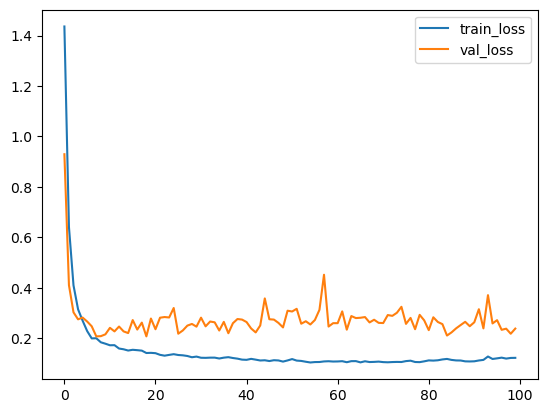

训练过程的准确率随epoch变化趋势：


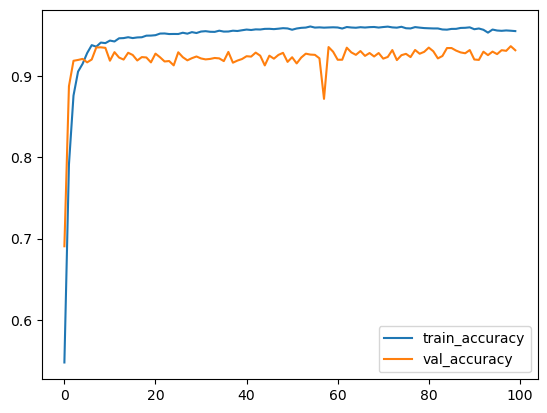

In [16]:
import matplotlib.pyplot as plt

print('训练过程的损失随epoch变化趋势：')
plt.plot(train_loss_record, label='train_loss')
plt.plot(val_loss_record, label='val_loss')
plt.legend()
plt.show()

print('训练过程的准确率随epoch变化趋势：')
plt.plot(train_accuracy_record, label='train_accuracy')
plt.plot(val_accuracy_record, label='val_accuracy')
plt.legend()
plt.show()

## 6. 验证模型，绘制结果

In [17]:
epoch_loss = 0
epoch_acc = 0
predicted_labels = []  # 模型结果标签，用于混淆矩阵
true_labels = []  # 模型真值标签，用于混淆矩阵

model.eval()
with torch.no_grad():
    for seq, labels in test_data:
        x,y = seq.to(device), labels.to(device)
        y_pred = model(x)
        y_pred = torch.squeeze(y_pred, dim=1) # 去除额外维度
        single_loss = loss_function(y_pred, y)
        
        # 获取预测正确的样本个数，由于pred为最大值所在位置的索引，
        # 因此不需要将label_test转换为one_hot编码
        # 当tensor为标量的时候，tensor.item()可以将其转换为ndarray类型
        # correct = pred.eq(label_test).sum().float().item()
        correct = torch.eq(y.argmax(dim=1), y_pred.argmax(dim=1))
        predicted_labels += y_pred.argmax(dim=1).tolist()
        true_labels += y.argmax(dim=1).tolist()
        
        epoch_acc += correct.sum().item()/ y.shape[0]
        epoch_loss += single_loss.item()

# 去平均
epoch_loss /= len(test_data)
epoch_acc /= len(test_data)

print(f'测试集平均损失：{epoch_loss}, \n测试集平均准确率：{epoch_acc}')

测试集平均损失：0.23935816232244927, 
测试集平均准确率：0.9312132130999095


### 修改结果储存路径，并存储结果

Confusion Matrix:
[[ 1143   163     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2  1537     0     0     0     0     0     0     0   358     0     0
      0     0     0     0]
 [    0     0  2501   433     0  1555    22    10     3    23    17     0
     12     0     0     9]
 [    0     0     0 17513  1508    25     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0   864  1671    13     0     0     0     0     0     0
      0    14     0     0]
 [    0    10  1594   566     2 66451    48     2    17   228   148     0
    157     1     0    14]
 [    0     0    12    51     1    32  1956    10     2     0     0     0
      0     0     0     0]
 [    0     0     0    76     8     1     1  2684  1961     0     0     0
      0     0     0     0]
 [    0     0     0     1     8    17     0   798  4240     0     0     0
      0     0     0     0]
 [    0     0     0    29     0    90     0     0     0 40953   130     0

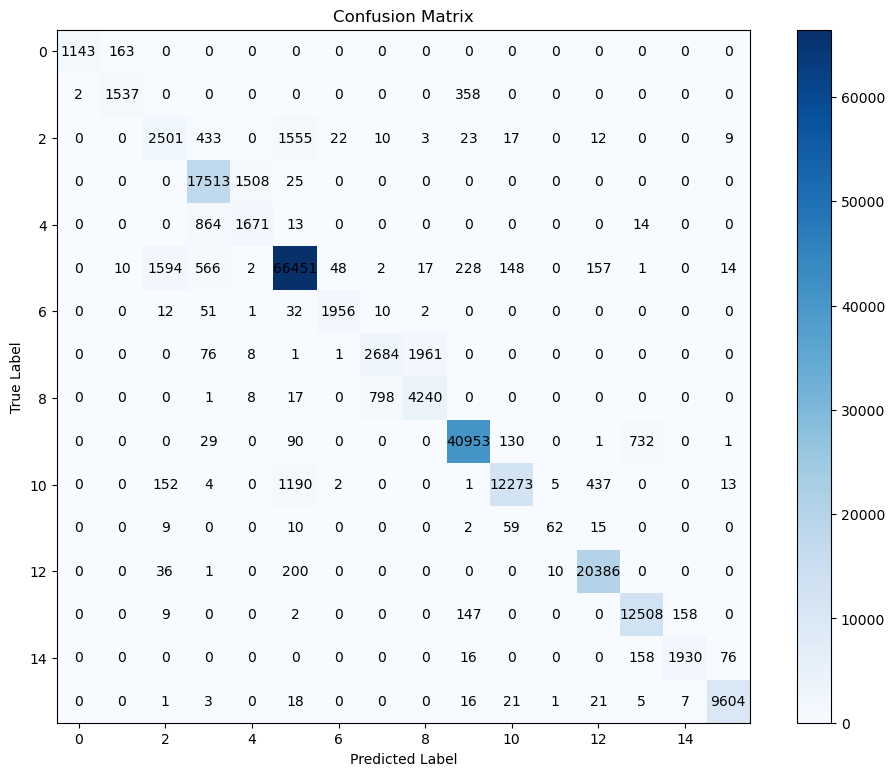

In [18]:
# 绘制混淆矩阵
# 混淆矩阵
from sklearn.metrics import confusion_matrix
# 初始化混淆矩阵
num_classes = 16
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
# 更新混淆矩阵
conf_matrix += confusion_matrix(true_labels, predicted_labels, labels=range(num_classes))
# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(12, 9))
# 设置颜色映射
cmap = plt.cm.Blues
# 绘制混淆矩阵图
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
# 添加文字标签
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
# 添加颜色条
plt.colorbar()
# 添加标题和标签
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix (Percentage):
[[8.75191424e+01 1.24808576e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.05429626e-01 8.10226674e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.88719030e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.45474373e+01 9.44383860e+00
  0.00000000e+00 3.39149400e+01 4.79825518e-01 2.18102508e-01
  6.54307525e-02 5.01635769e-01 3.70774264e-01 0.00000000e+00
  2.61723010e-01 0.00000000e+00 0.00000000e+00 1.96292257e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.19510658e+01
  7.91767300e+00 1.31261157e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

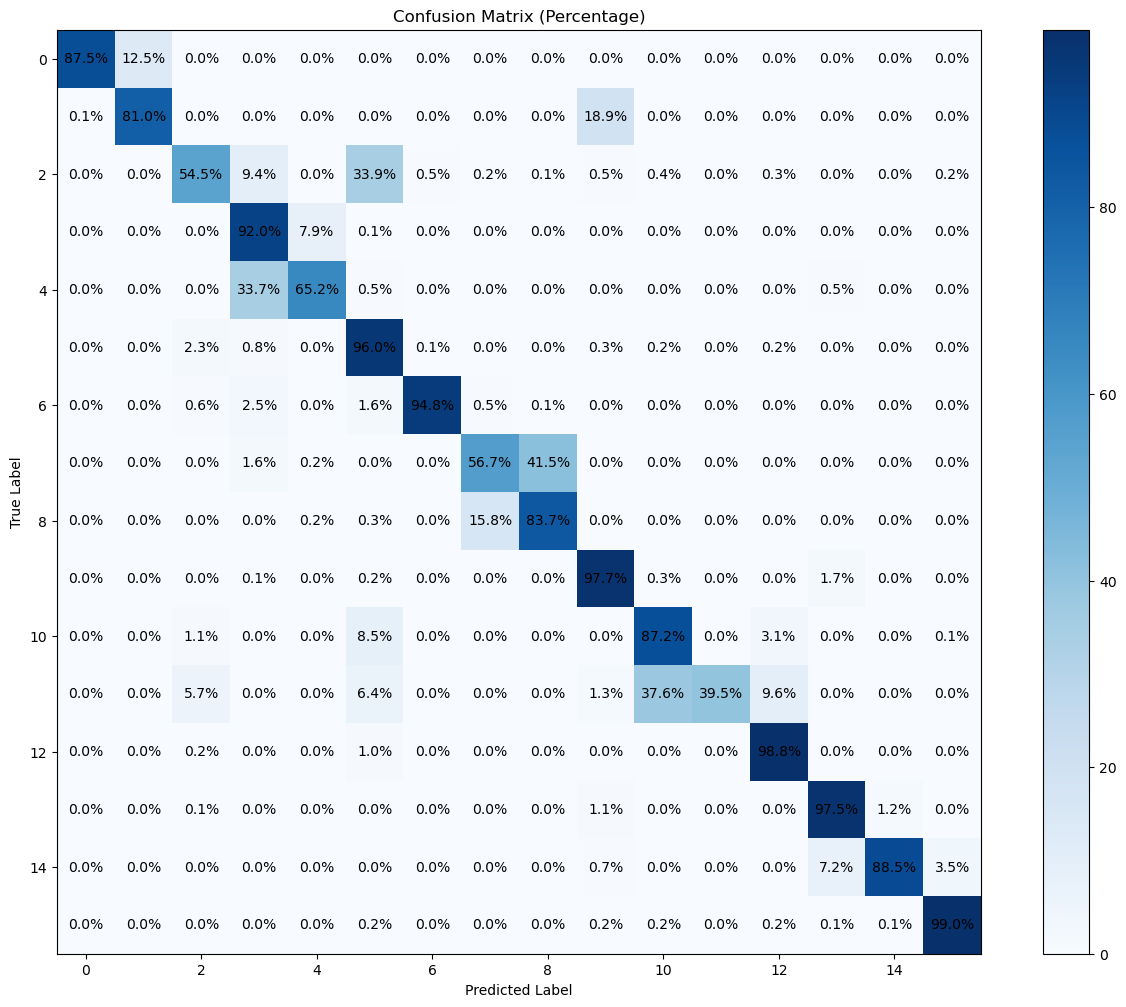

In [19]:
# 绘制百分比混淆矩阵
from sklearn.metrics import confusion_matrix

num_classes = 16
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
conf_matrix += confusion_matrix(true_labels, predicted_labels, labels=range(num_classes))

# 转换为百分比混淆矩阵
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 打印混淆矩阵
print("Confusion Matrix (Percentage):")
print(conf_matrix_percentage)

# 绘制百分比混淆矩阵
plt.figure(figsize=(16, 12))
cmap = plt.cm.Blues
plt.imshow(conf_matrix_percentage, interpolation='nearest', cmap=cmap)

# 添加文字标签
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, f'{conf_matrix_percentage[i, j]:.1f}%', ha='center', va='center', color='black')

# 添加颜色条
plt.colorbar()

# 添加标题和标签
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 显示图形
plt.show()

In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 计算总体的准确率、精确率、召回率、F1分数
def calculate_metrics_overall_by_sklearn(matrix):
    # 提取真实标签和预测标签
    true_labels = []
    pred_labels = []

    num_classes = matrix.shape[0]

    for i in range(num_classes):
        for j in range(num_classes):
            true_labels.extend([i] * matrix[i, j])
            pred_labels.extend([j] * matrix[i, j])

    # 计算总体的准确率、精确率、召回率和F1分数
    overall_accuracy = accuracy_score(true_labels, pred_labels)
    overall_precision = precision_score(true_labels, pred_labels, average='macro')
    overall_recall = recall_score(true_labels, pred_labels, average='macro')
    overall_f1 = f1_score(true_labels, pred_labels, average='macro')

    return overall_precision, overall_recall, overall_f1, overall_accuracy

real_overall_precision, real_overall_recall, real_overall_f1_score, real_overall_accuracy = calculate_metrics_overall_by_sklearn(conf_matrix)
print("总体精确率（Precision）: ", real_overall_precision)
print("总体召回率（Recall）: ", real_overall_recall)
print("总体F1 分数（F1 Score）: ", real_overall_f1_score)
print("总体准确率（Accuracy）: ", real_overall_accuracy)

总体精确率（Precision）:  0.8636933644796164
总体召回率（Recall）:  0.8248177735083347
总体F1 分数（F1 Score）:  0.8375145618929112
总体准确率（Accuracy）:  0.9312018566300466
